In [1]:
# Setting Working Directory
import os
os.chdir("D:\Edvisor\Project\Bike_Renting")

# Predictive Analysis



In [2]:
#Checking Current Working Directory
os.getcwd()

'D:\\Edvisor\\Project\\Bike_Renting'

In [3]:
# Loading Library
import pandas as pd
import os
import matplotlib as mtp
import numpy as np
import seaborn as sns
from fancyimpute import KNN 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from random import randrange, uniform
%matplotlib inline

C:\Users\YOGESH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
#Loading Dataset
data=pd.read_csv("Bike.CSV",sep=',')

In [5]:
# Checking top 5 rows
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#Getting Columns of a dataset

data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Visualization of corelation between Continuous Variable
col=['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']
type(col)

list

C:\Users\YOGESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E008656CC0>,
      dtype=object)

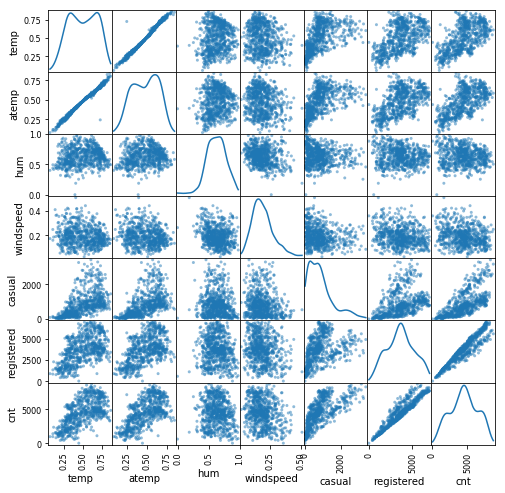

In [8]:
pd.scatter_matrix(data.loc[:,col],figsize=(8,8),diagonal='kde')

In [9]:
# Knowing Type of a Dataset
type(data)

pandas.core.frame.DataFrame

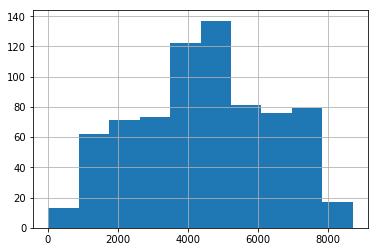

In [10]:
data['cnt'].hist()

In [11]:
#Knowing Shape of a variable
data.shape

(731, 16)

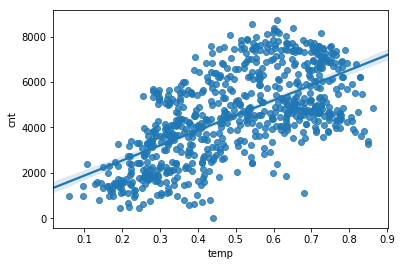

In [12]:
# Temp and Count in posivitively co related)
sns.regplot(x='temp',y='cnt',data=data,scatter='true')

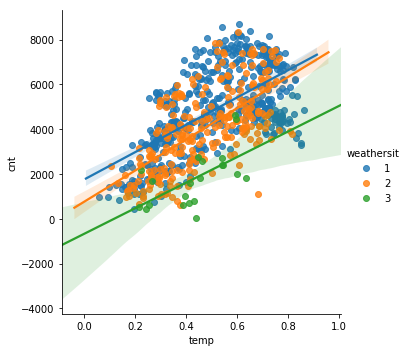

In [13]:
# Bike Rented more Day when weather is clear
g = sns.lmplot(x="temp", y="cnt", hue="weathersit", data=data)

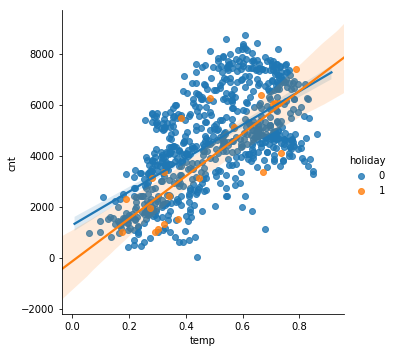

In [14]:
# When the temp is high and there is holiday count is less in compare to when temp is high and day is working
g = sns.lmplot(x="temp", y="cnt", data=data,hue="holiday")

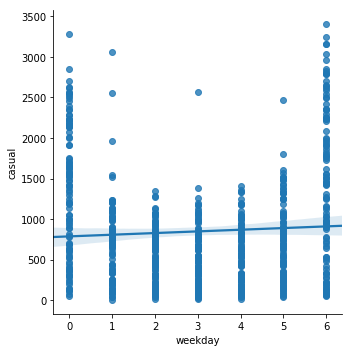

In [15]:
# Casual user uses bike mostly on weekends
g = sns.lmplot(x="weekday", y="casual", data=data)

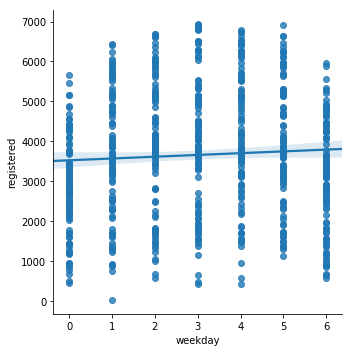

In [16]:
# registed user uses bike mostly on weekdays
g = sns.lmplot(x="weekday", y="registered", data=data)

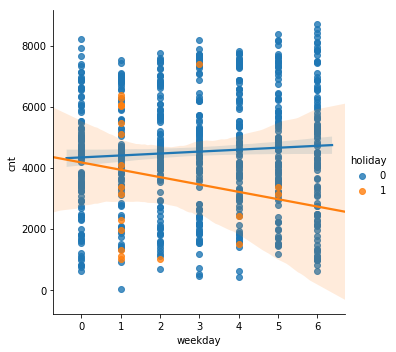

In [17]:
# Bike Rented more on weekdays and less on holidays
g = sns.lmplot(x="weekday", y="cnt", data=data,hue='holiday')

In [18]:
# Getting The Summary Of the dataset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [20]:
#Unique values in a column
data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [21]:
#Count of unique values in a column
data['cnt'].nunique()

696

In [22]:
# Check Skewness of the data
print(data.skew())


instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64


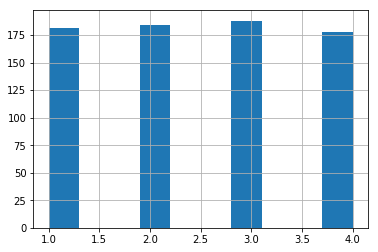

In [23]:
#Distribution of unique values in a column
data['season'].hist()

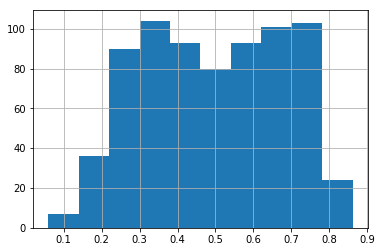

In [24]:
#Distribution of unique values in a column
data['temp'].hist()

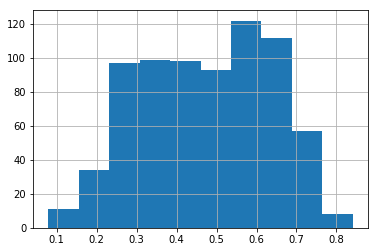

In [25]:
#Distribution of unique values in a column
data['atemp'].hist()

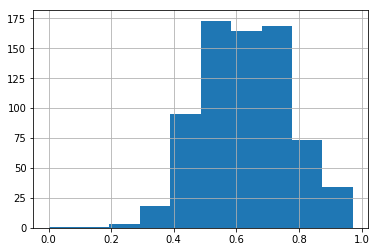

In [26]:
#Distribution of unique values in a column
data['hum'].hist()

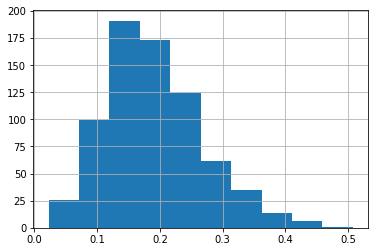

In [27]:
#Distribution of unique values in a column
data['windspeed'].hist()

In [28]:
# Checking DataTypes of a dataset
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#    Missing Value Analysis

In [29]:
# No Missing Value in a Dataset therefore no further analysis has been done
Missing_Value=pd.DataFrame(data.isnull().sum())
Missing_Value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Outlier Detection

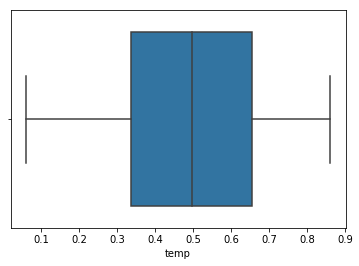

In [30]:
sns.boxplot(x=data['temp'])

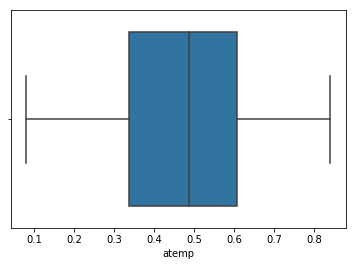

In [31]:
sns.boxplot(x=data['atemp'])

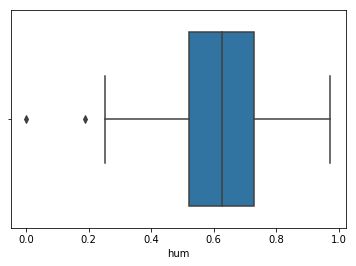

In [32]:
sns.boxplot(x=data['hum'])

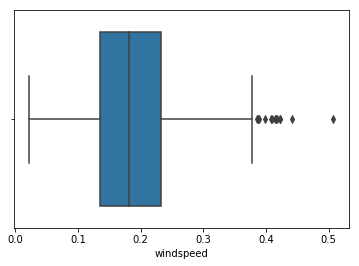

In [33]:
sns.boxplot(x=data['windspeed'])

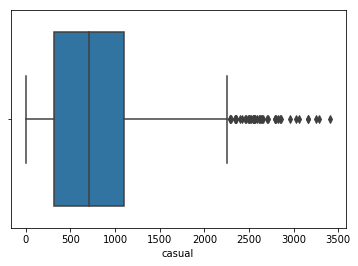

In [34]:
sns.boxplot(x=data['casual'])

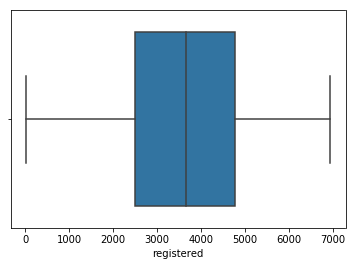

In [35]:
sns.boxplot(x=data['registered'])

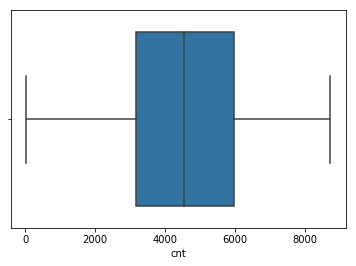

In [36]:
sns.boxplot(x=data['cnt'])

In [37]:
#Note: Outliers is present only in hum and windspeed column
# Lets Treat Outliers
# Continous Variables 
n_name=("hum","windspeed","casual")

In [38]:
print(n_name)

df=data.copy()






('hum', 'windspeed', 'casual')


In [39]:
# #Detect and delete outliers from data
for i in n_name:
 print(i)
 q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
 iqr = q75 - q25
 min = q25 - (iqr*1.5)
 max = q75 + (iqr*1.5)
 print(min)
 print(max)
 df.loc[df[i] < min, i]=np.nan
 print(i)
 df.loc[df[i] > max, i]=np.nan
 print(i)


    


hum
0.20468725
1.0455212500000002
hum
hum
windspeed
-0.012446750000000034
0.38061125
windspeed
windspeed
casual
-855.25
2266.75
casual
casual


In [40]:
 #Calculate missing value
missing_val = pd.DataFrame(df.isnull().sum())

In [41]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [42]:
#imputation method for hum
#Actual value = 0.407
#Mean = 0.62
#Median = 0.62
#KNN = 0.67




In [43]:
#imputation method for windspeed
#Actual value = 0.223
#Mean = 0.186
#Median = 0.178
#KNN = 0.00



In [44]:
#Impute with mean h
for i in n_name:
    df[i] = df[i].fillna(df[i].mean())



In [45]:
#Checking Missing Values After Mean Imputation
missing_val = pd.DataFrame(df.isnull().sum())

In [46]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Feature Selection

In [47]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered      int64
cnt             int64
dtype: object

In [48]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [49]:
# Storing Continuous Variable for Corr Analysis
num_var=['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered','cnt']

In [50]:
num_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [51]:
#Correlation plot
df_corr = df.loc[:,num_var]

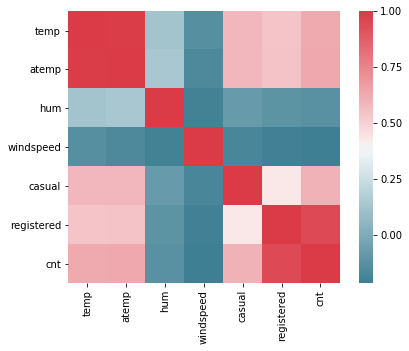

In [52]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [53]:
# temp and atemp is highly correlated
df_corr.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.123703,-0.140000,0.584468,0.540012,0.627494
atemp,0.991702,1.000000,0.137293,-0.165315,0.583603,0.544192,0.631066
hum,0.123703,0.137293,1.000000,-0.201894,-0.079809,-0.112238,-0.121518
windspeed,-0.140000,-0.165315,-0.201894,1.000000,-0.180378,-0.204112,-0.216473
casual,0.584468,0.583603,-0.079809,-0.180378,1.000000,0.425080,0.603295
registered,0.540012,0.544192,-0.112238,-0.204112,0.425080,1.000000,0.945517
cnt,0.627494,0.631066,-0.121518,-0.216473,0.603295,0.945517,1.000000


In [54]:
df = df.drop(['instant', 'dteday', 'atemp','casual','registered'], axis=1)

In [55]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [56]:
df.shape

(731, 11)

# Some Visualization

C:\Users\YOGESH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


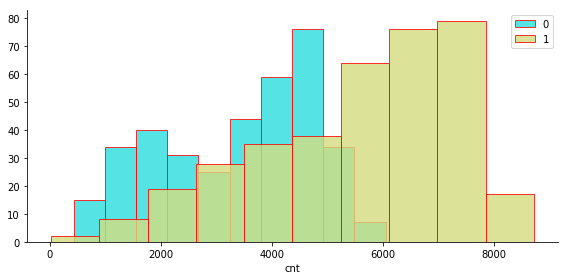

In [57]:
#Analysis shows more bike was rented on year 2011
g=sns.FacetGrid(df, hue='yr', palette='rainbow',size=4,aspect=2)
g=g.map(plt.hist,'cnt',alpha=0.8, edgecolor='r')
plt.legend()

Text(0.5,1,'Number of bikes Rented per Season')

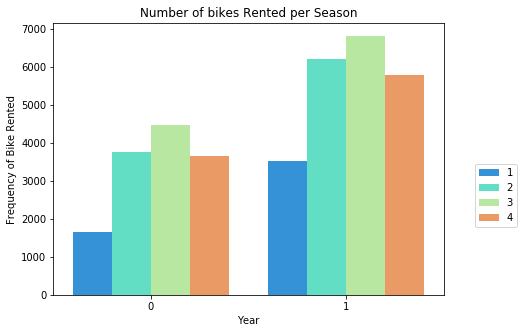

In [58]:
##Seasonwise Analysis
#1.Spring
#2.Summer
#3. Fall
#4. Winter
# Bike was rented mostly during Winter and Fall Season on year 2011

plt.figure(figsize=(7,5))
sns.barplot('yr','cnt',hue='season', data=df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Frequency of Bike Rented')
plt.title('Number of bikes Rented per Season')

Text(0.5,1,'Month Wise Count of bikes Rented \n Depending on weather ')

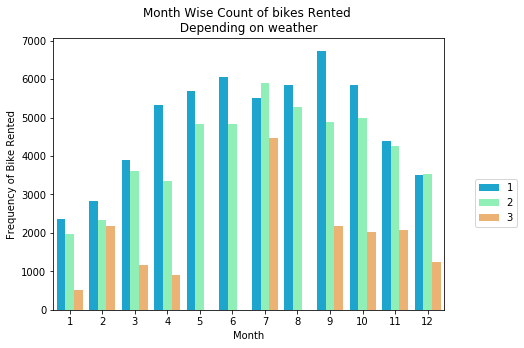

In [59]:
#Bike was rented mostly when the weather is clear between June and September

plt.figure(figsize=(7,5))
sns.barplot('mnth','cnt',hue='weathersit', data=df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Month')
plt.ylabel('Frequency of Bike Rented')
plt.title('Month Wise Count of bikes Rented \n Depending on weather ')

In [60]:
df.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
5,1,0,1,0,4,1,1,0.204348,0.518261,0.089565,1606
6,1,0,1,0,5,1,2,0.196522,0.498696,0.168726,1510
7,1,0,1,0,6,0,2,0.165000,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.138333,0.434167,0.361950,822
9,1,0,1,0,1,1,1,0.150833,0.482917,0.223267,1321


C:\Users\YOGESH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


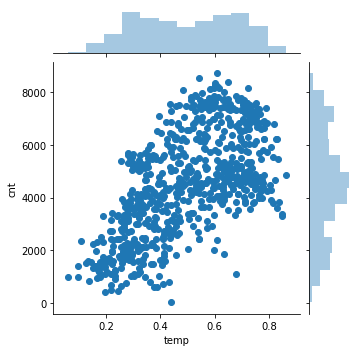

In [61]:
# Count on Bike Rented Increases With Increase In Temp
sns.jointplot('temp','cnt',data=df,size=5)

In [62]:
# Pairplots
dummy_pair=df.loc[:,['temp','hum','windspeed','cnt','weathersit']]
dummy_pair

#dummy_pair2=df.loc[:,['temp','hum','windspeed','cnt','season']]
#dummy_pair2



,temp,hum,windspeed,cnt,weathersit
0,0.344167,0.805833,0.160446,985,2
1,0.363478,0.696087,0.248539,801,2
2,0.196364,0.437273,0.248309,1349,1
3,0.200000,0.590435,0.160296,1562,1
4,0.226957,0.436957,0.186900,1600,1
5,0.204348,0.518261,0.089565,1606,1
6,0.196522,0.498696,0.168726,1510,2
7,0.165000,0.535833,0.266804,959,2
8,0.138333,0.434167,0.361950,822,1
9,0.150833,0.482917,0.223267,1321,1


C:\Users\YOGESH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\YOGESH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\YOGESH\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


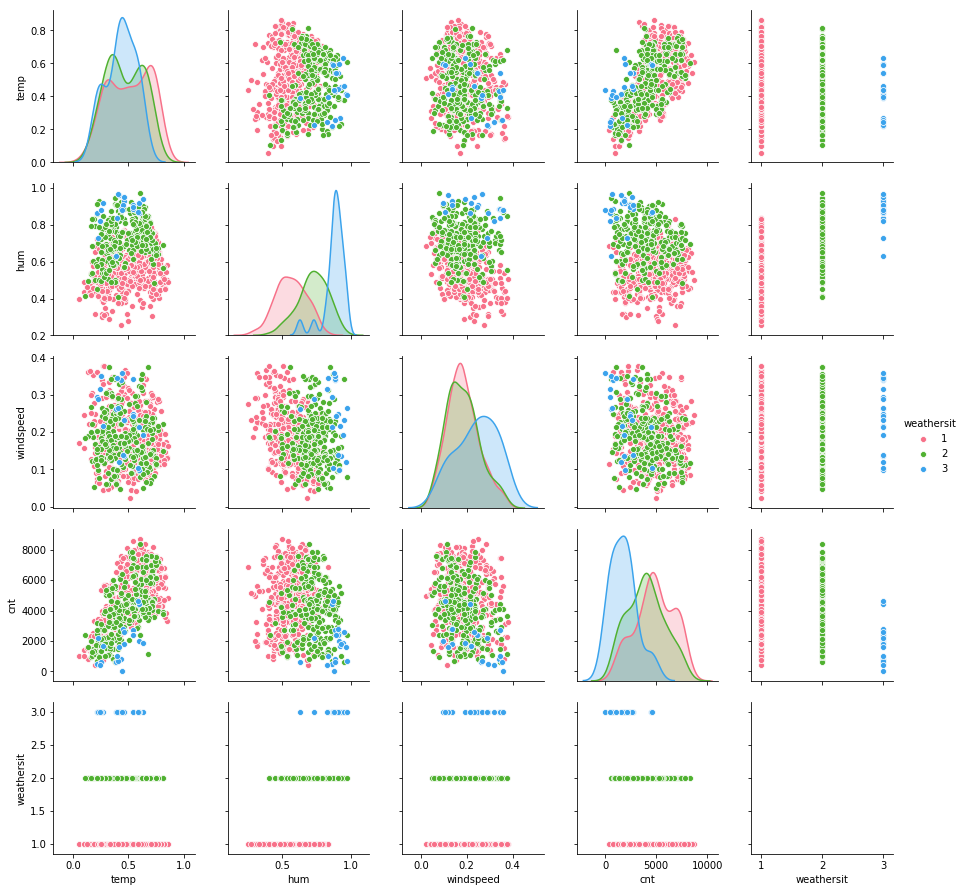

In [63]:
#Pairplot based on Weather Situation
g = sns.pairplot(dummy_pair, palette="husl",hue='weathersit')

# Model Development

In [64]:
df.shape

(731, 11)

In [65]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

C:\Users\YOGESH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)



In [67]:
train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
561,3,1,7,0,0,0,1,0.745833,0.717917,0.166667,6031
379,1,1,1,0,0,0,1,0.166667,0.419167,0.251258,2311
362,1,0,12,0,4,1,1,0.248333,0.574167,0.119412,2423
638,4,1,9,0,0,0,1,0.526667,0.583333,0.134958,6889
133,2,0,5,0,6,0,2,0.520833,0.922500,0.134950,3409


In [68]:
train.shape

(584, 11)

In [69]:
test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
613,3,1,9,0,3,1,1,0.736667,0.741250,0.187808,7112
421,1,1,2,0,0,0,1,0.279167,0.410000,0.205229,3389
201,3,0,7,0,4,1,2,0.815000,0.691250,0.222021,3784
290,4,0,10,0,2,1,2,0.532500,0.701667,0.110087,4748
18,1,0,1,0,3,1,2,0.292174,0.741739,0.208317,1650


In [70]:
test.shape

(147, 11)

# Decision Tree

In [71]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=5,max_leaf_nodes=5,min_samples_leaf=10).fit(train.iloc[:,0:10], train.iloc[:,10])


In [72]:
Train_X=list(train.iloc[:,0:10])

In [73]:
Train_X

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [74]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:10])

In [76]:
predictions_DT

array([6624.20879121, 2457.34482759, 4286.95348837, 4286.95348837,
       2189.7398374 , 2189.7398374 , 2189.7398374 , 6624.20879121,
       2457.34482759, 6624.20879121, 6624.20879121, 2189.7398374 ,
       4286.95348837, 4286.95348837, 4286.95348837, 4414.97435897,
       4286.95348837, 2189.7398374 , 4286.95348837, 4286.95348837,
       2189.7398374 , 4414.97435897, 6624.20879121, 2189.7398374 ,
       2189.7398374 , 4286.95348837, 4286.95348837, 4414.97435897,
       2189.7398374 , 2189.7398374 , 6624.20879121, 4286.95348837,
       6624.20879121, 2189.7398374 , 2457.34482759, 4414.97435897,
       6624.20879121, 6624.20879121, 2457.34482759, 2457.34482759,
       6624.20879121, 4414.97435897, 4286.95348837, 6624.20879121,
       2189.7398374 , 4286.95348837, 2457.34482759, 6624.20879121,
       2457.34482759, 4414.97435897, 6624.20879121, 4286.95348837,
       2189.7398374 , 2189.7398374 , 4414.97435897, 6624.20879121,
       2189.7398374 , 6624.20879121, 4414.97435897, 4286.95348

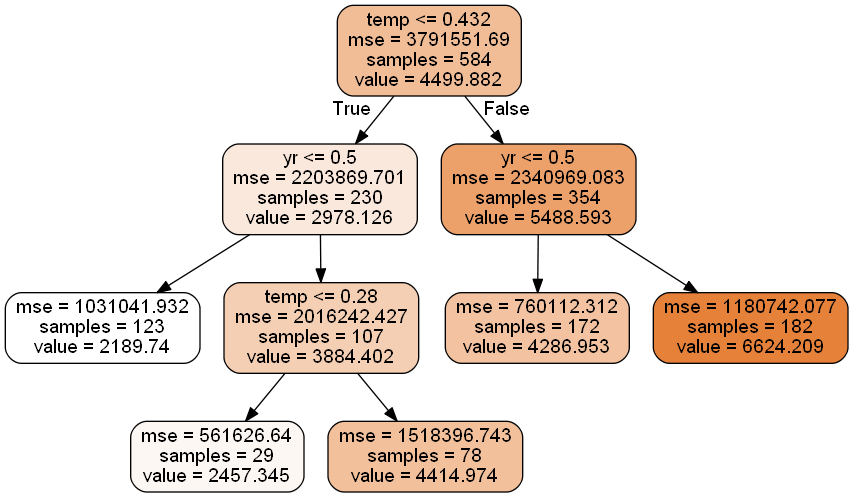

In [77]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot


dot_data=StringIO()
export_graphviz(fit_DT, out_file=dot_data,feature_names=Train_X,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [78]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape



In [79]:
Error=MAPE(test.iloc[:,10], predictions_DT)

In [80]:
Error

22.563377706263342

In [81]:
Accuracy =100-Error

In [82]:
Accuracy

77.43662229373666

# Linear Regression

In [142]:
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)


In [143]:
df.shape

(731, 11)

In [144]:
print(train.shape)
print(test.shape)

(584, 11)
(147, 11)


In [145]:
#Import libraries for LR
import statsmodels.api as sm

In [146]:
# Train the model using the training sets
LR_fit = sm.OLS(train.iloc[:,10], train.iloc[:,0:10]).fit()




In [147]:
LR_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1681.
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:19:05   Log-Likelihood:                -4793.7
No. Observations:                 584   AIC:                             9607.
Df Residuals:                     574   BIC:                             9651.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       568.2739     63.089      9.007      0.000     444.360     692.188
yr          2147.7342     73.167     29.354      0.000    2004.027    2291.442
mnth         -37.0161     19.807     -1.869      0.062     -75.919       1.886
holiday     -365.4268    234.102     -1.561      0.119    -825.227      94.374
weekday       85.5326     18.088      4.729      0.000      50.006     121.059
workingday   229.5165     80.513      2.851      0.005      71.380     387.653
weathersit  -705.6275     91.100     -7.746      0.000    -884.557    -526.698
temp        5563.8419    218.197     25.499      0.000    5135.281    5992.403
hum          249.7116    298.335      0.837      0.403    -336.251     835.674
windspeed   -517.1135    451.031     -1.147      0.252   -1402.986     368.759
==============================================================================
Omnibus:                       78.902   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.467
Skew:                          -0.743   Prob(JB):                     1.30e-38
Kurtosis:                       5.227   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# make the predictions by the model
predictions_LR = LR_fit.predict(test.iloc[:,0:10]) 


In [154]:
df.iloc[42,10]

1472

In [150]:
predictions_LR

491    4924.889831
262    3636.301742
461    5270.677804
42     1570.485414
214    4648.505293
707    5377.237174
41     1568.178257
729    2928.915982
476    6139.061038
690    5859.899010
78     1612.461133
321    3358.123283
203    6034.907530
231    5211.366588
394    3774.519943
198    5260.497316
405    3524.789386
98     2146.342635
261    3424.782516
171    4364.041762
642    6989.022863
555    6529.251388
720    3280.670442
181    5463.024888
686    5672.725917
149    4149.288711
458    5474.905423
210    5756.706139
399    3345.336619
681    5822.069224
          ...     
196    5112.128394
119    3429.094255
363    1899.214034
563    7908.612431
541    7193.226841
678    6001.564017
271    5322.197713
657    6564.617399
694    4714.923856
266    4592.133678
664    6466.559260
535    6682.674983
573    7963.426725
723    2620.208775
500    5613.944914
83     2451.131015
489    6641.448862
366    3137.380182
36     1447.536544
431    4583.546018
86     2071.434418
23      723.

In [155]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [156]:
#Calculate MAPE
error=MAPE(test.iloc[:,10], predictions_LR)


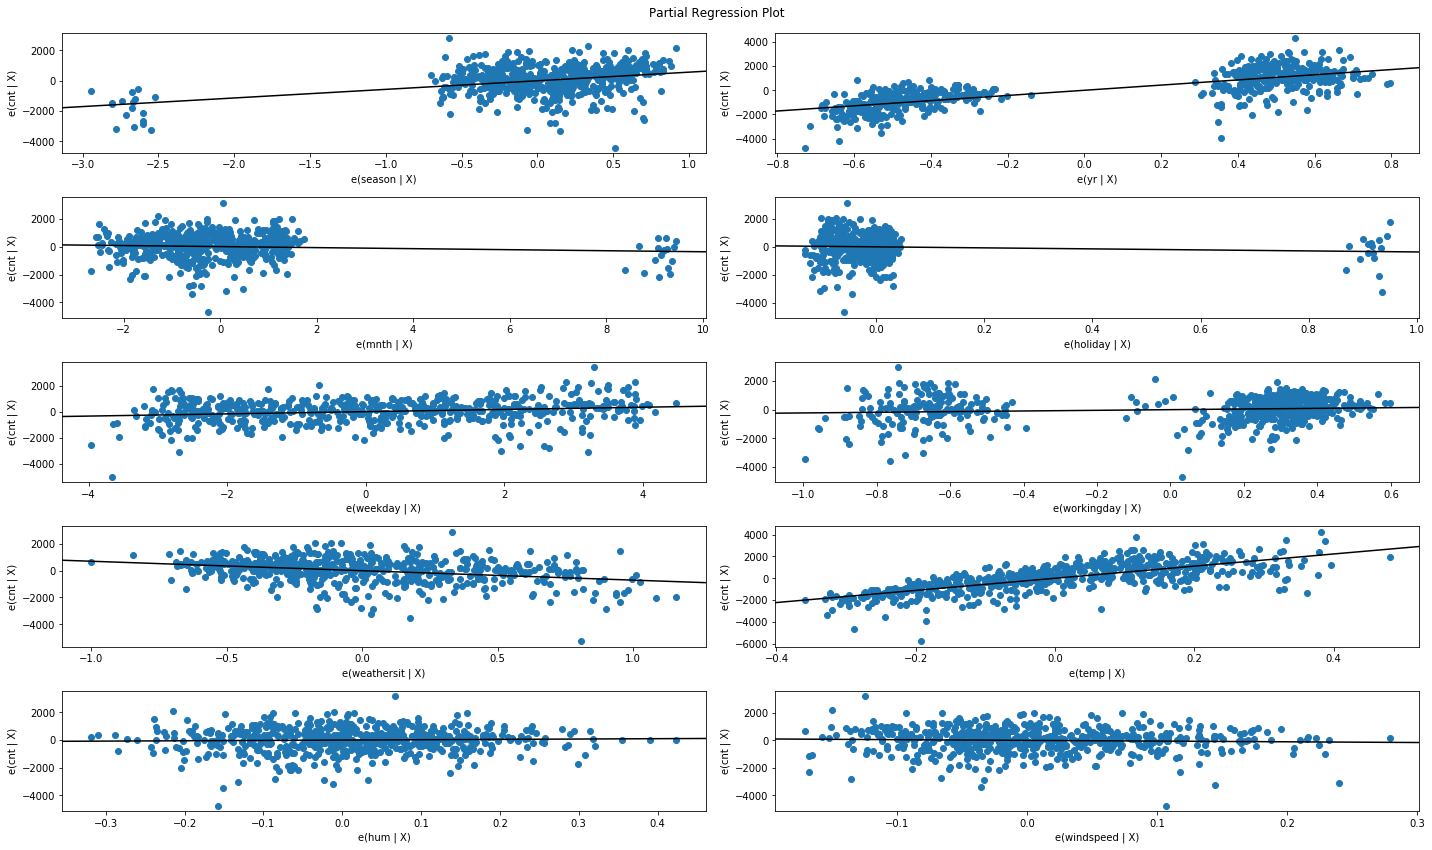

In [157]:
# this produces our six partial regression plots

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(LR_fit, fig=fig)

In [158]:
# Error 
error

20.719096411549607

In [161]:
Accuracy=100-error

In [162]:
Accuracy

79.2809035884504

In [180]:
# After Removing Insignificant Variable

In [201]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [202]:
df_dup=df.copy()

In [203]:
df_dup=df_dup.drop(['hum', 'windspeed','holiday'],axis=1)

In [204]:
df_dup.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'cnt'],
      dtype='object')

In [205]:
#Divide data into train and test
train, test = train_test_split(df_dup, test_size=0.2)


In [206]:
print(train.shape)
print(test.shape)

(584, 8)
(147, 8)


In [207]:
# Train the model using the training sets
LR_fit_dup = sm.OLS(train.iloc[:,7], train.iloc[:,0:7]).fit()

#train.iloc[:,0:12], train.iloc[:,12]



In [208]:
LR_fit_dup.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2214.
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:45:40   Log-Likelihood:                -4819.9
No. Observations:                 584   AIC:                             9654.
Df Residuals:                     577   BIC:                             9684.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       576.9837     65.692      8.783      0.000     447.960     706.007
yr          2173.0764     75.454     28.800      0.000    2024.878    2321.275
mnth         -42.5215     20.532     -2.071      0.039     -82.849      -2.194
weekday       83.2736     18.303      4.550      0.000      47.324     119.223
workingday   249.0526     80.701      3.086      0.002      90.549     407.556
weathersit  -636.1377     58.553    -10.864      0.000    -751.140    -521.136
temp        5461.1050    200.374     27.255      0.000    5067.553    5854.657
==============================================================================
Omnibus:                       91.517   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.230
Skew:                          -0.830   Prob(JB):                     3.02e-47
Kurtosis:                       5.459   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
# make the predictions by the model
predictions_LR = LR_fit_dup.predict(test.iloc[:,0:7]) 


In [210]:
test.iloc[:,7]

598    7006
473    4367
147    4758
690    5146
17      683
559    7499
708    3228
549    6660
653    5875
266    5423
296    4187
74     2192
630    8395
197    5302
198    4458
512    6591
339    2594
341    3322
177    4708
633    7538
75     2744
567    4459
182    5119
576    7105
103    3267
318    4195
718    5267
50     1812
724    1013
35     1005
       ... 
562    6830
12     1406
220    4602
241    5204
640    4639
305    4186
652    6639
132    4105
45     1815
625    6869
551    6241
243    5115
365    2294
20     1543
519    7641
90     2227
282    5117
16     1000
134    4553
398    4151
255    4763
292    4195
672    5138
451    5102
469    7460
417    4773
360    1162
622    8009
526    6598
564    5713
Name: cnt, Length: 147, dtype: int64

In [211]:
predictions_LR

598    6888.486731
473    4913.865843
147    4386.436582
690    5805.599028
17      861.027735
559    6995.232386
708    4796.454258
549    7650.050070
653    6183.169500
266    4465.679667
296    4109.218559
74     1670.505471
630    6934.556080
197    4724.609509
198    5207.116023
512    6246.461077
339    2830.624617
341    3195.428064
177    4263.077075
633    6881.387570
75     2661.786950
567    5451.511956
182    5328.918487
576    7293.721248
103    3482.957197
318    3877.908411
718    5649.306337
50     1413.403006
724    2724.915632
35      993.562759
          ...     
562    7471.207160
12     1381.553688
220    5402.597593
241    4660.799321
640    5789.583945
305    3764.501191
652    6268.536891
132    3133.321286
45     1724.531769
625    5753.374803
551    8071.450603
243    4871.290651
365    4092.009722
20     1533.091073
519    5726.092900
90     2015.357970
282    4447.234791
16      305.702847
134    2740.956115
398    4405.444215
255    4681.987080
292    4427.

In [212]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [213]:
#Calculate MAPE
Error=MAPE(test.iloc[:,7], predictions_LR)


In [214]:
Accuracy=100-Error

In [215]:
Error

16.96125315410849

In [216]:
Accuracy

83.03874684589151

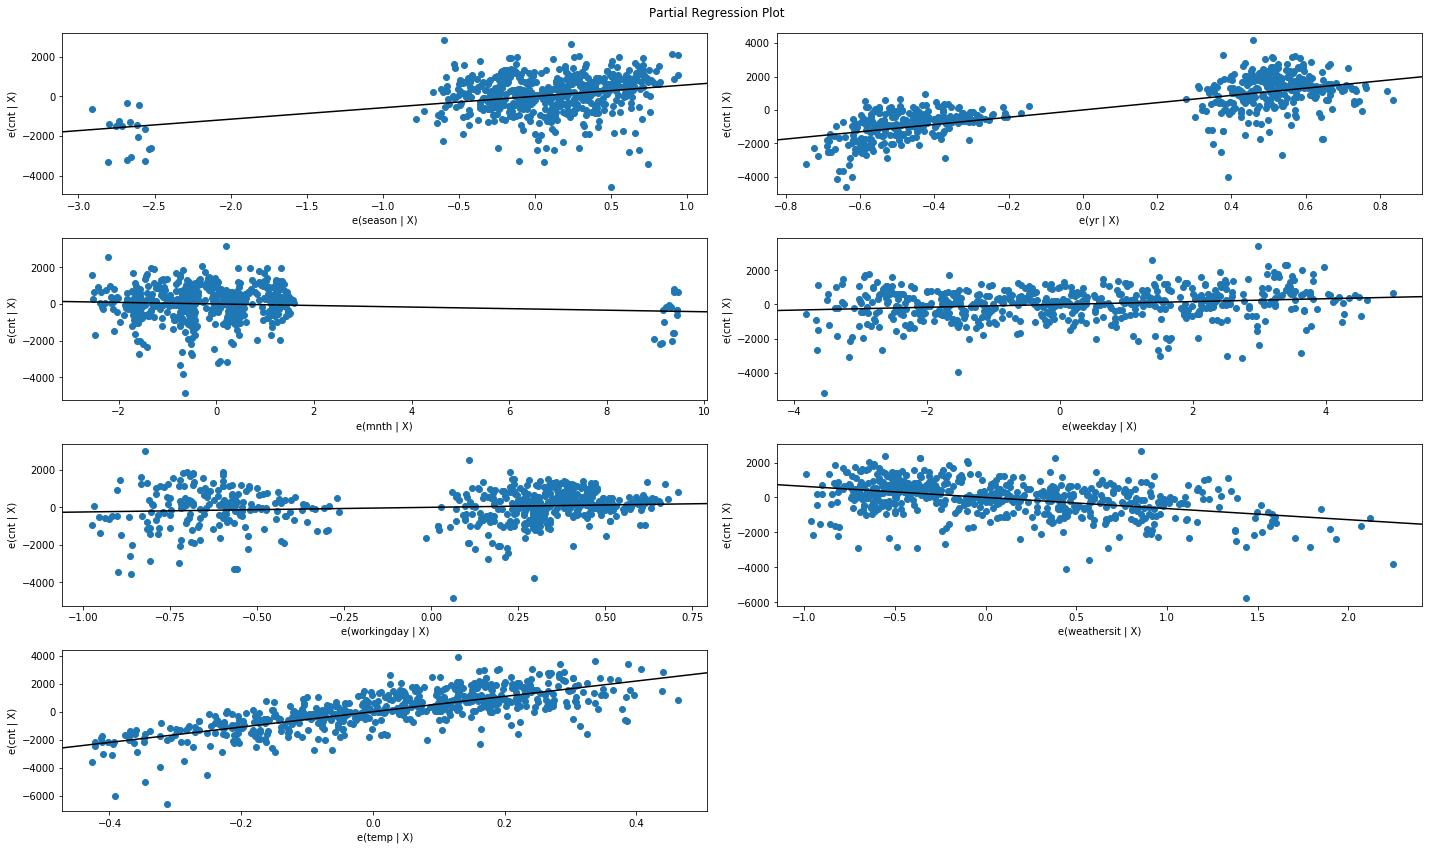

In [217]:
# this produces our six partial regression plots

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(LR_fit_dup, fig=fig)